In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('adult.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [3]:
data.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [4]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


## How does different factor impact the income. 

In [5]:
data['income'].replace(['<=50K', '>50K'], [0,1], inplace=True)
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,0


Text(0, 0.5, 'Frequency')

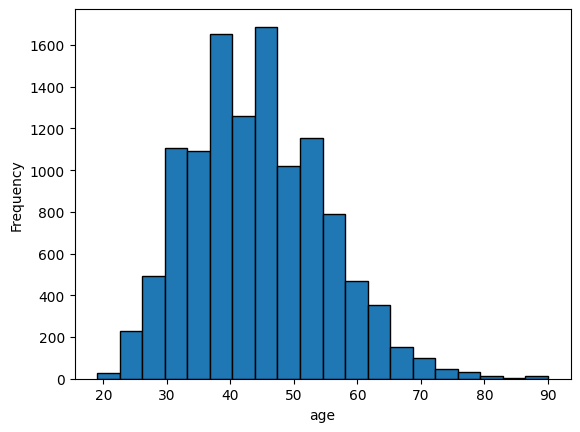

In [6]:
income_greater_50k = data[data['income'] == 1]

plt.hist(income_greater_50k['age'], bins=20, edgecolor='black')
plt.xlabel('age')
plt.ylabel('Frequency')

## Based on the above histogram, we can see that most people at their 30s and 40s have income over 50k. but as their age increase, it is less frequent. 

Text(0.5, 0, 'Race')

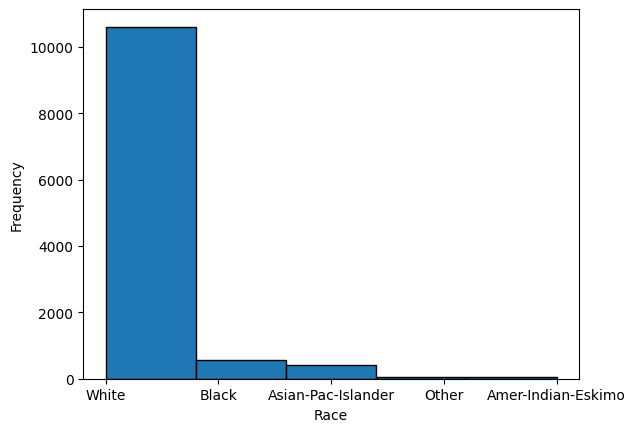

In [7]:
plt.hist(income_greater_50k['race'], bins=5, edgecolor='black')
plt.ylabel('Frequency')
plt.xlabel('Race')

Text(0.5, 0, 'Gender')

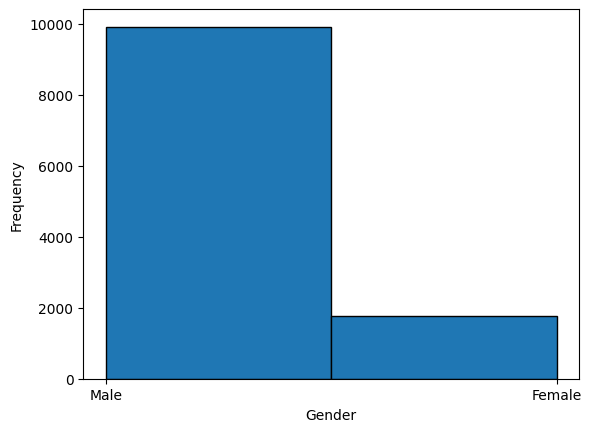

In [8]:
plt.hist(income_greater_50k['gender'], bins=2, edgecolor='black')
plt.ylabel('Frequency')
plt.xlabel('Gender')

## Majority of the males population have income over 50k  

Text(0.5, 0, 'Occupation')

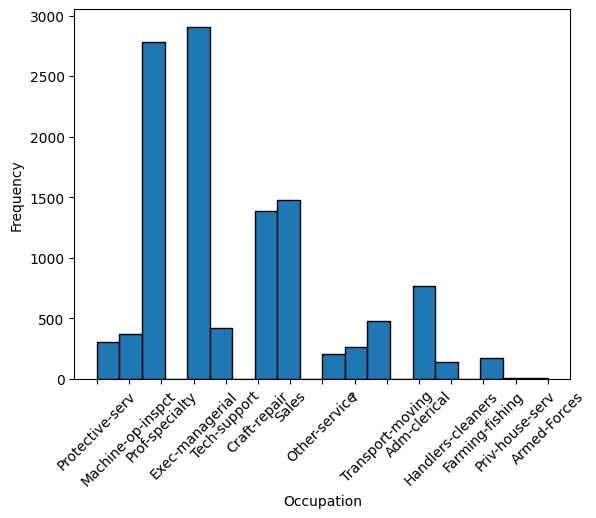

In [9]:
plt.hist(income_greater_50k['occupation'], bins=20, edgecolor='black')
plt.xticks(rotation = 45)
plt.ylabel('Frequency')
plt.xlabel('Occupation')

## Jobs leaning toward technical side have higher pay

Text(0.5, 0, 'Relationship')

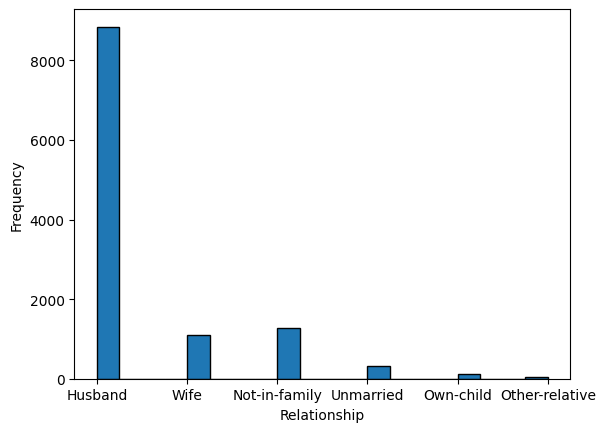

In [10]:
plt.hist(income_greater_50k['relationship'], bins=20, edgecolor='black')
plt.ylabel('Frequency')
plt.xlabel('Relationship')

## Another evidence that supports males are the majority with income over 50k. 

Text(0.5, 0, 'Hours per week')

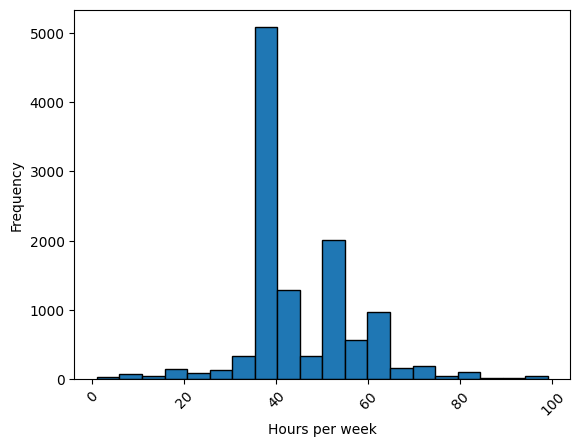

In [11]:
plt.hist(income_greater_50k['hours-per-week'], bins=20, edgecolor='black')
plt.xticks(rotation = 45)
plt.ylabel('Frequency')
plt.xlabel('Hours per week')

## Typical full time 40 hours getting over 50k

Text(0.5, 0, 'Education')

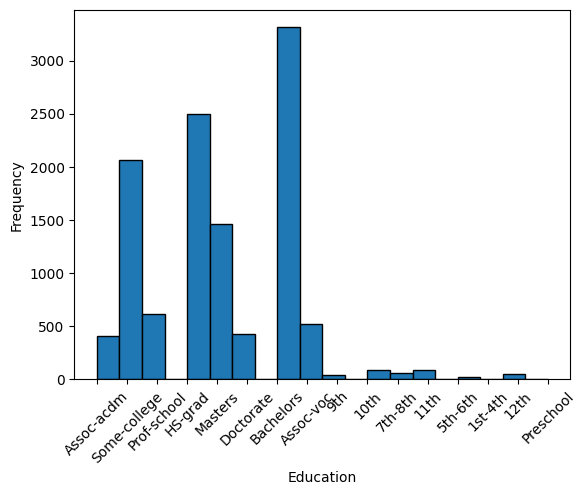

In [12]:
plt.hist(income_greater_50k['education'], bins=20, edgecolor='black')
plt.xticks(rotation= 45)
plt.ylabel('Frequency')
plt.xlabel('Education')

## Bachelors are the most frequence education that receives over 50k 

Text(0.5, 0, 'Education')

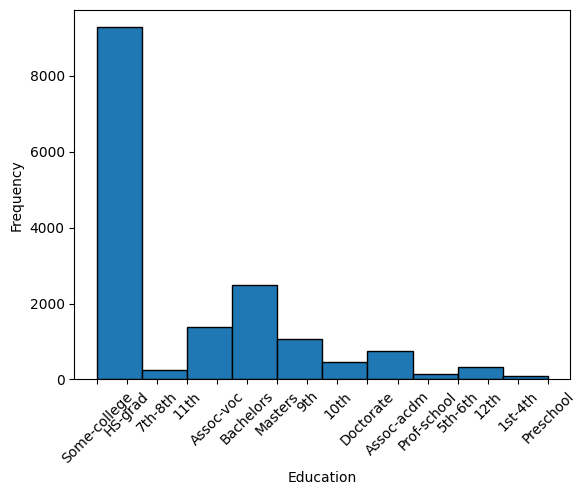

In [18]:
women = data[data['gender'] == 'Female']
plt.hist(women['education'], edgecolor='black')
plt.xticks(rotation= 45)
plt.ylabel('Frequency')
plt.xlabel('Education')

## Most of the women did not complete college

Text(0.5, 0, 'Relationship')

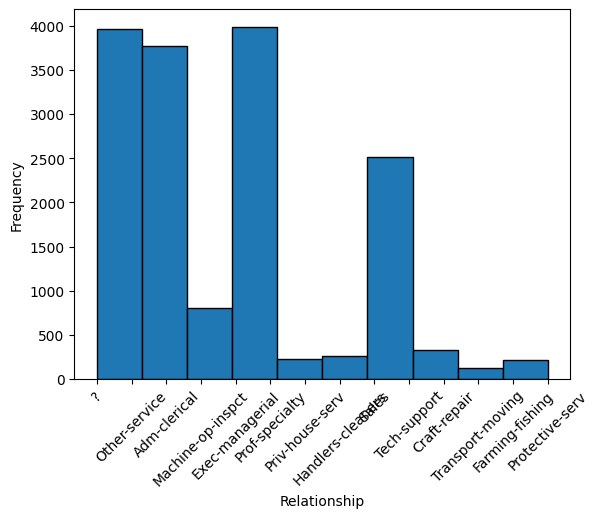

In [21]:
women = data[data['gender'] == 'Female']
plt.hist(women['occupation'], edgecolor='black')
plt.xticks(rotation= 45)
plt.ylabel('Frequency')
plt.xlabel('Relationship')

Text(0.5, 0, 'Race')

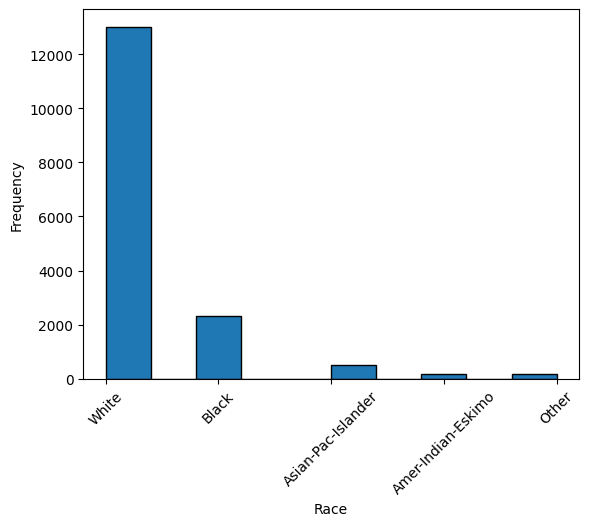

In [23]:
women = data[data['gender'] == 'Female']
plt.hist(women['race'], edgecolor='black')
plt.xticks(rotation= 45)
plt.ylabel('Frequency')
plt.xlabel('Race')

age                32650
workclass          32650
fnlwgt             32650
education          32650
educational-num    32650
marital-status     32650
occupation         32650
relationship       32650
race               32650
gender             32650
capital-gain       32650
capital-loss       32650
hours-per-week     32650
native-country     32650
income             32650
dtype: int64


Text(0.5, 0, 'Race')

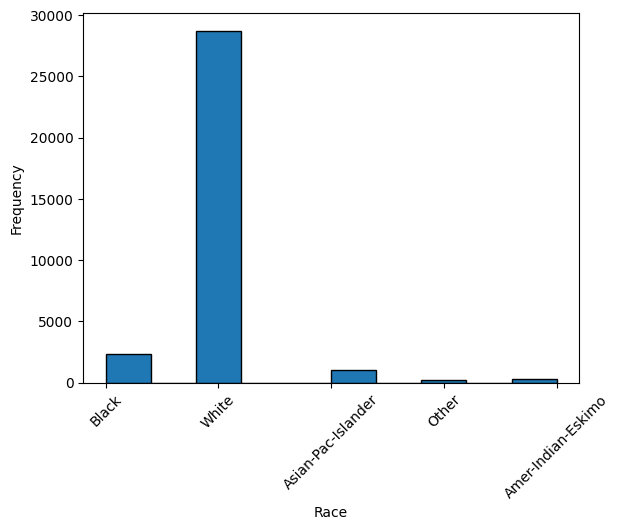

In [26]:
men = data[data['gender'] == 'Male']
print(men.count())
plt.hist(men['race'], edgecolor='black')
plt.xticks(rotation= 45)
plt.ylabel('Frequency')
plt.xlabel('Race')